In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

In [28]:
df_sleep_efficiency = pd.read_csv('Sleep_Efficiency.csv')
df_sleep_efficiency

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


#### Data Cleaning: 
    Fill missing values 
    Scale features  
    Add Weather Data 

### Fill Missing Values

In [29]:
df_sleep_efficiency[df_sleep_efficiency.isna().any(axis=1)]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,NaN,0.0,No,1.0
19,20,52,Male,2021-12-03 00:30:00,2021-12-03 07:30:00,7.0,0.89,28,52,20,NaN,50.0,0.0,Yes,3.0
20,21,24,Male,2021-05-02 00:00:00,2021-05-02 08:00:00,8.0,0.83,15,75,10,3.0,0.0,NaN,No,2.0
24,25,24,Male,2021-09-16 00:00:00,2021-09-16 07:00:00,7.0,0.88,15,75,10,1.0,NaN,5.0,No,2.0
26,27,36,Female,2021-06-18 00:00:00,2021-06-18 07:00:00,7.0,0.95,28,55,17,0.0,NaN,0.0,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,435,28,Female,2021-08-11 23:00:00,2021-08-11 07:00:00,8.0,0.90,22,63,15,NaN,75.0,2.0,No,4.0
440,441,28,Female,2021-02-06 21:00:00,2021-02-06 05:00:00,8.0,0.88,22,63,15,0.0,75.0,NaN,Yes,2.0
442,443,27,Female,2021-02-06 01:30:00,2021-02-06 08:30:00,7.0,0.68,23,22,55,1.0,NaN,4.0,No,1.0
446,447,23,Male,2021-04-21 00:00:00,2021-04-21 07:00:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN


In [30]:
test = df_sleep_efficiency['Caffeine consumption'][~df_sleep_efficiency['Caffeine consumption'].isna()]
test.mean()

23.653395784543324

In [12]:
column_list = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Old nan replacement with zeros
#df_sleep_efficiency[column_list] = df_sleep_efficiency[column_list].fillna(0)

In [48]:
def replace_nan(df, columns, by=0):
    df_new = df.copy()
    if by=='mean':
        for column in columns:
            df_column = df_new[column][~df_new[column].isna()]
            mean_column = round(df_column.mean())
            print(column)
            print(mean_column)
            df_new[column] = df_new[column].fillna(mean_column)
    else:
        df_new[columns] = df_new[columns].fillna(0)
    return df_new

In [49]:
test_df = replace_nan(df_sleep_efficiency, column_list, by='mean')
test_df.head(6)

Awakenings
2
Caffeine consumption
24
Alcohol consumption
1
Exercise frequency
2


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,23,60,17,0.0,24.0,0.0,No,1.0


In [5]:
# Check for remaining nan values
df_sleep_efficiency[df_sleep_efficiency.isna().any(axis=1)]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency


### Distributions

<AxesSubplot:ylabel='Density'>

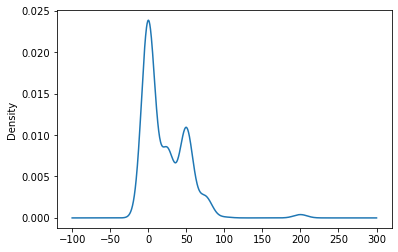

In [8]:
df_sleep_efficiency['Caffeine consumption'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

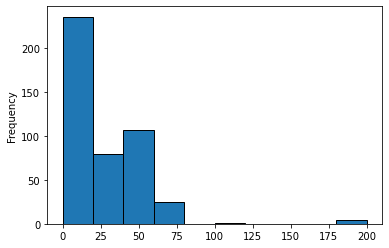

In [9]:
df_sleep_efficiency['Caffeine consumption'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Density'>

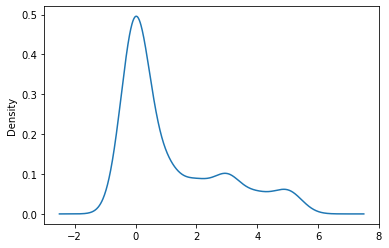

In [10]:
df_sleep_efficiency['Alcohol consumption'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

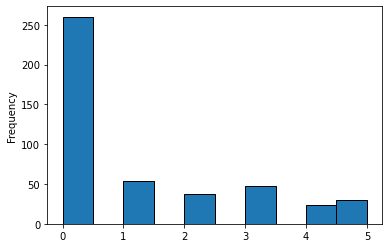

In [11]:
df_sleep_efficiency['Alcohol consumption'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Density'>

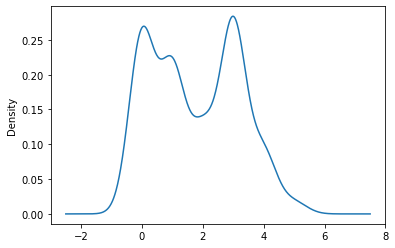

In [12]:
df_sleep_efficiency['Exercise frequency'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

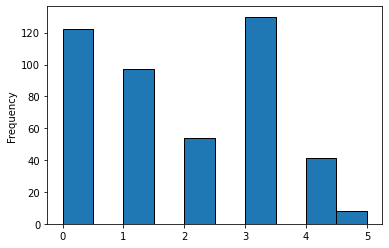

In [13]:
df_sleep_efficiency['Exercise frequency'].plot(kind='hist', edgecolor='black')

In [14]:
features_list = ['Exercise frequency', 'Alcohol consumption', 'Caffeine consumption', 'Awakenings', 'Age']
df_features = df_sleep_efficiency[features_list]

## Scaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(df_features)
scaled_features = scaler.transform(df_features)
print(scaled_features)

[[0.6        0.         0.         0.         0.93333333]
 [0.6        0.6        0.         0.75       1.        ]
 [0.6        0.         0.         0.25       0.51666667]
 ...
 [0.         0.6        0.         0.25       0.51666667]
 [0.6        0.         0.         0.75       0.6       ]
 [0.2        0.         0.25       0.25       0.15      ]]


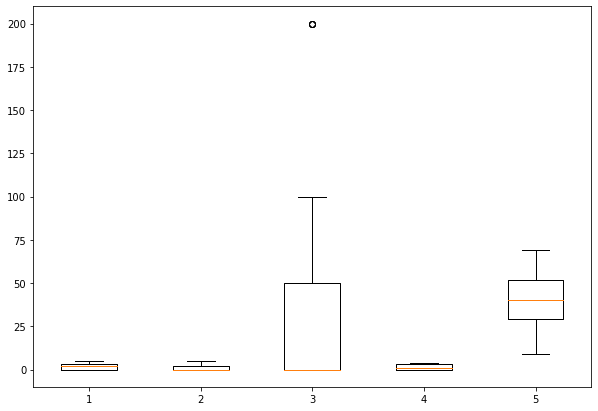

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df_features)
plt.show()

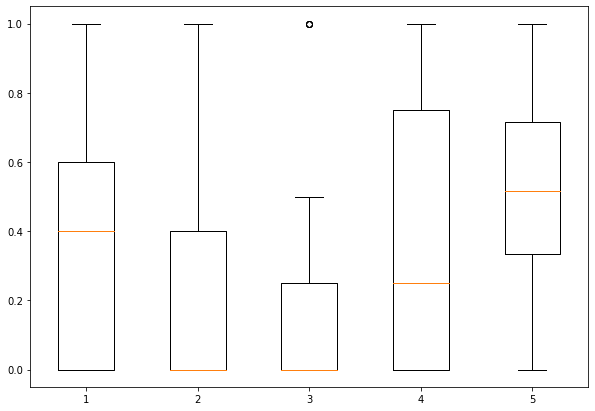

In [17]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(scaled_features)
plt.show()

In [18]:
df_scaled = df_sleep_efficiency.copy()
df_scaled[features_list] = scaled_features
df_scaled

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,0.933333,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,Yes,0.6
1,2,1.000000,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,Yes,0.6
2,3,0.516667,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,0.25,0.000,0.0,No,0.6
3,4,0.516667,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,0.75,0.250,1.0,Yes,0.2
4,5,0.800000,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,0.75,0.000,0.6,No,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,0.300000,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,No,1.0
448,449,0.716667,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,1.00,0.125,0.0,No,0.6
449,450,0.516667,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,0.25,0.000,0.6,Yes,0.0
450,451,0.600000,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,0.75,0.000,0.0,No,0.6


In [19]:
#df_scaled['Smoking status'] = df_scaled['Smoking status'][df_scaled['Smoking status'] = 'Yes'] = 1

df_scaled['Smoking status'].replace('Yes', 1, inplace=True)
df_scaled['Smoking status'].replace('No', 0, inplace=True)
df_scaled['Gender'].replace('Female', 0, inplace=True)
df_scaled['Gender'].replace('Male', 1, inplace=True)

df_scaled

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6
1,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6
2,3,0.516667,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,0.25,0.000,0.0,0,0.6
3,4,0.516667,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,0.75,0.250,1.0,1,0.2
4,5,0.800000,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,0.75,0.000,0.6,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0
448,449,0.716667,1,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,1.00,0.125,0.0,0,0.6
449,450,0.516667,0,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,0.25,0.000,0.6,1,0.0
450,451,0.600000,1,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,0.75,0.000,0.0,0,0.6


In [20]:
#df_scaled.to_csv('sleep_efficiency_scaled.csv')

<AxesSubplot:ylabel='Density'>

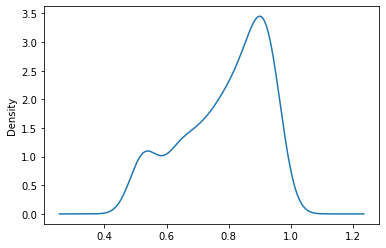

In [21]:
df_scaled['Sleep efficiency'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

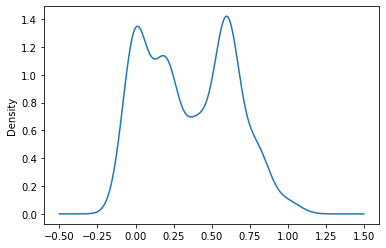

In [22]:
df_scaled['Exercise frequency'].plot(kind='kde')

## Weather Data

### Max Temp

In [24]:
max_temp_data = pd.read_csv('Weather_Oxford_max_temp.txt', sep=',', header=0)
max_temp_data.columns = max_temp_data.columns.str.replace(' ', '')
max_temp_data

,STAID,SOUID,DATE,TX,Q_TX
0,274,922,18141201,-9999,9
1,274,922,18141202,-9999,9
2,274,922,18141203,-9999,9
3,274,922,18141204,-9999,9
4,274,922,18141205,-9999,9
...,...,...,...,...,...
76028,274,922,20230127,57,0
76029,274,922,20230128,96,0
76030,274,922,20230129,94,0
76031,274,922,20230130,119,0


In [25]:
max_temp_data = max_temp_data[max_temp_data['DATE'] > 20210000]
max_temp_data = max_temp_data[max_temp_data['DATE'] < 20220000]
max_temp_data

,STAID,SOUID,DATE,TX,Q_TX
75272,274,922,20210101,45,0
75273,274,922,20210102,51,0
75274,274,922,20210103,50,0
75275,274,922,20210104,45,0
75276,274,922,20210105,48,0
...,...,...,...,...,...
75632,274,922,20211227,110,0
75633,274,922,20211228,148,0
75634,274,922,20211229,153,0
75635,274,922,20211230,151,0


In [26]:
max_temp_data = max_temp_data[['DATE', 'TX']]
max_temp_data['DATE'] = pd.to_datetime(max_temp_data['DATE'], format='%Y%m%d')
max_temp_data

<ipython-input-26-3f02d9a6d8c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp_data['DATE'] = pd.to_datetime(max_temp_data['DATE'], format='%Y%m%d')


,DATE,TX
75272,2021-01-01,45
75273,2021-01-02,51
75274,2021-01-03,50
75275,2021-01-04,45
75276,2021-01-05,48
...,...,...
75632,2021-12-27,110
75633,2021-12-28,148
75634,2021-12-29,153
75635,2021-12-30,151


### Min Temp

In [27]:
min_temp_data = pd.read_csv('Weather_Oxford_min_temp.txt', sep=',', header=0)
min_temp_data.columns = min_temp_data.columns.str.replace(' ', '')

min_temp_data = min_temp_data[min_temp_data['DATE'] > 20210000]
min_temp_data = min_temp_data[min_temp_data['DATE'] < 20220000]

min_temp_data = min_temp_data[['DATE', 'TN']]
min_temp_data['DATE'] = pd.to_datetime(min_temp_data['DATE'], format='%Y%m%d')
min_temp_data

,DATE,TN
75241,2021-01-01,-40
75242,2021-01-02,-8
75243,2021-01-03,-2
75244,2021-01-04,13
75245,2021-01-05,8
...,...,...
75601,2021-12-27,52
75602,2021-12-28,80
75603,2021-12-29,65
75604,2021-12-30,88


In [37]:
min_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 75241 to 75605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    365 non-null    datetime64[ns]
 1   TN      365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [40]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    float64
 2   Gender                  452 non-null    int64  
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    int64  
 14  Exercise frequency      452 non-null    fl

## Combine Temperatures

In [39]:
df_time

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06 01:00:00
1,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05 02:00:00
2,3,0.516667,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,0.25,0.000,0.0,0,0.6,2021-05-25 21:30:00
3,4,0.516667,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,0.75,0.250,1.0,1,0.2,2021-11-03 02:30:00
4,5,0.800000,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,0.75,0.000,0.6,0,0.6,2021-03-13 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13 22:00:00
448,449,0.716667,1,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,1.00,0.125,0.0,0,0.6,2021-03-31 21:00:00
449,450,0.516667,0,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,0.25,0.000,0.6,1,0.0,2021-09-07 23:00:00
450,451,0.600000,1,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,0.75,0.000,0.0,0,0.6,2021-07-29 21:00:00


In [42]:
df_time = df_scaled.copy()
df_time['Date'] = [date[:10] for date in df_time['Bedtime']]
df_time

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06
1,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05
2,3,0.516667,0,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,0.25,0.000,0.0,0,0.6,2021-05-25
3,4,0.516667,0,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,0.75,0.250,1.0,1,0.2,2021-11-03
4,5,0.800000,1,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,0.75,0.000,0.6,0,0.6,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13
448,449,0.716667,1,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,1.00,0.125,0.0,0,0.6,2021-03-31
449,450,0.516667,0,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,0.25,0.000,0.6,1,0.0,2021-09-07
450,451,0.600000,1,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,0.75,0.000,0.0,0,0.6,2021-07-29


In [44]:
df_time = df_scaled.copy()
df_time['Date'] = [date[:10] for date in df_time['Bedtime']]
df_time['Date'] = pd.to_datetime(df_time['Date'], format='%Y-%m-%d')
df_total = df_time.merge(max_temp_data, left_on='Date', right_on='DATE')
df_total = df_total.merge(min_temp_data, left_on='Date', right_on='DATE')
df_total = df_total.drop(columns=['DATE_x', 'DATE_y'])
df_total = df_total.rename(columns={"TX": "Max temp", "TN": "Min temp"})
df_total

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date,Max temp,Min temp
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06,66,-15
1,138,0.450000,1,2021-03-06 02:00:00,2021-03-06 09:00:00,7.0,0.77,22,65,13,0.50,0.000,0.0,1,0.6,2021-03-06,66,-15
2,233,0.450000,0,2021-03-06 23:00:00,2021-03-06 04:00:00,5.0,0.87,22,65,13,0.25,0.125,0.2,0,0.0,2021-03-06,66,-15
3,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05,81,42
4,196,0.866667,0,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.67,23,23,54,0.50,0.250,1.0,0,0.0,2021-12-05,81,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,436,0.516667,0,2021-02-12 22:00:00,2021-02-12 05:00:00,7.0,0.96,28,57,15,0.00,0.000,0.0,0,0.6,2021-02-12,23,-23
448,437,0.833333,1,2021-06-10 21:30:00,2021-06-10 05:30:00,8.0,0.72,27,55,18,0.50,0.000,0.6,0,0.6,2021-06-10,233,152
449,446,0.350000,0,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,1.00,0.250,0.4,1,0.2,2021-11-16,121,27
450,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13,124,101


In [45]:
temp_columns = ['Max temp', 'Min temp']
df_temps = df_total[temp_columns]
df_temps

,Max temp,Min temp
0,66,-15
1,66,-15
2,66,-15
3,81,42
4,81,42
...,...,...
447,23,-23
448,233,152
449,121,27
450,124,101


In [47]:
# Apply MinMaxScaler on the new temperature columns
scaler = MinMaxScaler()
scaler.fit(df_temps)
scaled_temps = scaler.transform(df_temps)
print(scaled_temps)

[[0.21086262 0.10526316]
 [0.21086262 0.10526316]
 [0.21086262 0.10526316]
 [0.25878594 0.35526316]
 [0.25878594 0.35526316]
 [0.53035144 0.42982456]
 [0.53035144 0.42982456]
 [0.53035144 0.42982456]
 [0.29073482 0.17105263]
 [0.29073482 0.17105263]
 [0.31948882 0.35087719]
 [0.74760383 0.63157895]
 [0.74760383 0.63157895]
 [0.93290735 0.90789474]
 [0.93290735 0.90789474]
 [0.58785942 0.69298246]
 [0.25559105 0.36403509]
 [0.67731629 0.64473684]
 [0.67731629 0.64473684]
 [0.30351438 0.17982456]
 [0.30351438 0.17982456]
 [0.35782748 0.36403509]
 [0.35782748 0.36403509]
 [0.64536741 0.71491228]
 [0.38658147 0.50438596]
 [0.71884984 0.78070175]
 [0.71884984 0.78070175]
 [0.71884984 0.78070175]
 [0.26837061 0.22807018]
 [0.26837061 0.22807018]
 [0.44408946 0.39035088]
 [0.67731629 0.75      ]
 [0.67731629 0.75      ]
 [0.67731629 0.75      ]
 [0.66134185 0.89473684]
 [0.25239617 0.18859649]
 [0.25239617 0.18859649]
 [0.37699681 0.21052632]
 [0.81469649 0.82894737]
 [0.30351438 0.15350877]


In [48]:
df_scaled_temps = df_total.copy()
df_scaled_temps[temp_columns] = scaled_temps
df_scaled_temps

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Date,Max temp,Min temp
0,1,0.933333,0,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.00,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
1,138,0.450000,1,2021-03-06 02:00:00,2021-03-06 09:00:00,7.0,0.77,22,65,13,0.50,0.000,0.0,1,0.6,2021-03-06,0.210863,0.105263
2,233,0.450000,0,2021-03-06 23:00:00,2021-03-06 04:00:00,5.0,0.87,22,65,13,0.25,0.125,0.2,0,0.0,2021-03-06,0.210863,0.105263
3,2,1.000000,1,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,0.75,0.000,0.6,1,0.6,2021-12-05,0.258786,0.355263
4,196,0.866667,0,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.67,23,23,54,0.50,0.250,1.0,0,0.0,2021-12-05,0.258786,0.355263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,436,0.516667,0,2021-02-12 22:00:00,2021-02-12 05:00:00,7.0,0.96,28,57,15,0.00,0.000,0.0,0,0.6,2021-02-12,0.073482,0.070175
448,437,0.833333,1,2021-06-10 21:30:00,2021-06-10 05:30:00,8.0,0.72,27,55,18,0.50,0.000,0.6,0,0.6,2021-06-10,0.744409,0.837719
449,446,0.350000,0,2021-11-16 23:00:00,2021-11-16 06:30:00,7.5,0.53,28,20,52,1.00,0.250,0.4,1,0.2,2021-11-16,0.386581,0.289474
450,448,0.300000,0,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.00,0.000,0.0,0,1.0,2021-11-13,0.396166,0.614035


In [53]:
#df_scaled_temps.to_csv('sleep_efficiency_scaled_temps_2.csv', sep=',')
